<a href="https://colab.research.google.com/github/myllanes/ECGR4105M.Y/blob/main/exercise_neuralnetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Michael Yllanes


In [ ]:
%matplotlib inline
import numpy as np
import torch
import torch.optim as optim

In [ ]:
# prepare the data
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) # <1>
t_u = torch.tensor(t_u).unsqueeze(1) # <1>

t_u.shape

torch.Size([11, 1])

In [ ]:
# split data into training and validation
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([0, 4, 2, 6, 7, 9, 3, 1, 8]), tensor([ 5, 10]))

In [ ]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [ ]:
import torch.nn as nn
# we are defining only one layer of neuron, no activation. This is identical to the linear regression model we developed.
linear_model = nn.Linear(1, 1) # <1>
# doing one forward pass with this model
linear_model(t_un_val) # notice we don't need to pass parameters explicitly

tensor([[0.9805],
        [1.6054]], grad_fn=<AddmmBackward0>)

In [ ]:
# check the initial values of the parameters
linear_model.weight

Parameter containing:
tensor([[0.3205]], requires_grad=True)

In [ ]:
# check the initial values of the parameters
linear_model.bias

Parameter containing:
tensor([-0.5866], requires_grad=True)

In [ ]:
linear_model = nn.Linear(1, 1) # <1>
optimizer = optim.SGD(
    linear_model.parameters(), # <2>
    lr=1e-2)

In [ ]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train) # <1>
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val) # <1>
        loss_val = loss_fn(t_p_val, t_c_val)

        optimizer.zero_grad()
        loss_train.backward() # <2>
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")


In [ ]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

linear_model = nn.Linear(1, 1) # <1>
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 3000,
    optimizer = optimizer,
    model = linear_model,
    loss_fn = loss_fn,
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 110.6665, Validation loss 161.9023
Epoch 1000, Training loss 3.7071, Validation loss 3.6053
Epoch 2000, Training loss 3.1650, Validation loss 2.3416
Epoch 3000, Training loss 3.1538, Validation loss 2.1823

Parameter containing:
tensor([[5.2399]], requires_grad=True)
Parameter containing:
tensor([-16.7294], requires_grad=True)


In [ ]:
# use a built-in loss function
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 3000,
    optimizer = optimizer,
    model = linear_model,
    loss_fn = nn.MSELoss(), # <1>
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 244.2544, Validation loss 354.6340
Epoch 1000, Training loss 3.7507, Validation loss 3.6687
Epoch 2000, Training loss 3.1659, Validation loss 2.3489
Epoch 3000, Training loss 3.1539, Validation loss 2.1833

Parameter containing:
tensor([[5.2396]], requires_grad=True)
Parameter containing:
tensor([-16.7275], requires_grad=True)


In [ ]:
# add activation layers
seq_model = nn.Sequential(
            nn.Linear(1, 13), # <1>
            nn.Tanh(),
            nn.Linear(13, 1)) # <2>
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [ ]:
[param.shape for param in seq_model.parameters()]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

In [ ]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [ ]:
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1))
]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [ ]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [ ]:
seq_model.output_linear.bias

Parameter containing:
tensor([0.0239], requires_grad=True)

In [ ]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3) # <1>

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print('output', seq_model(t_un_val))
print('answer', t_c_val)
print('hidden', seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 185.0643, Validation loss 270.3333
Epoch 1000, Training loss 6.1307, Validation loss 3.0895
Epoch 2000, Training loss 5.3238, Validation loss 1.2022
Epoch 3000, Training loss 3.0276, Validation loss 0.2481
Epoch 4000, Training loss 2.3793, Validation loss 0.0794
Epoch 5000, Training loss 2.2065, Validation loss 0.0942
output tensor([[ 7.2929],
        [20.5280]], grad_fn=<AddmmBackward0>)
answer tensor([[ 8.],
        [21.]])
hidden tensor([[ 4.7725],
        [-0.2490],
        [-0.0300],
        [ 4.7809],
        [-0.2520],
        [-0.2324],
        [-4.6994],
        [ 5.1010]])


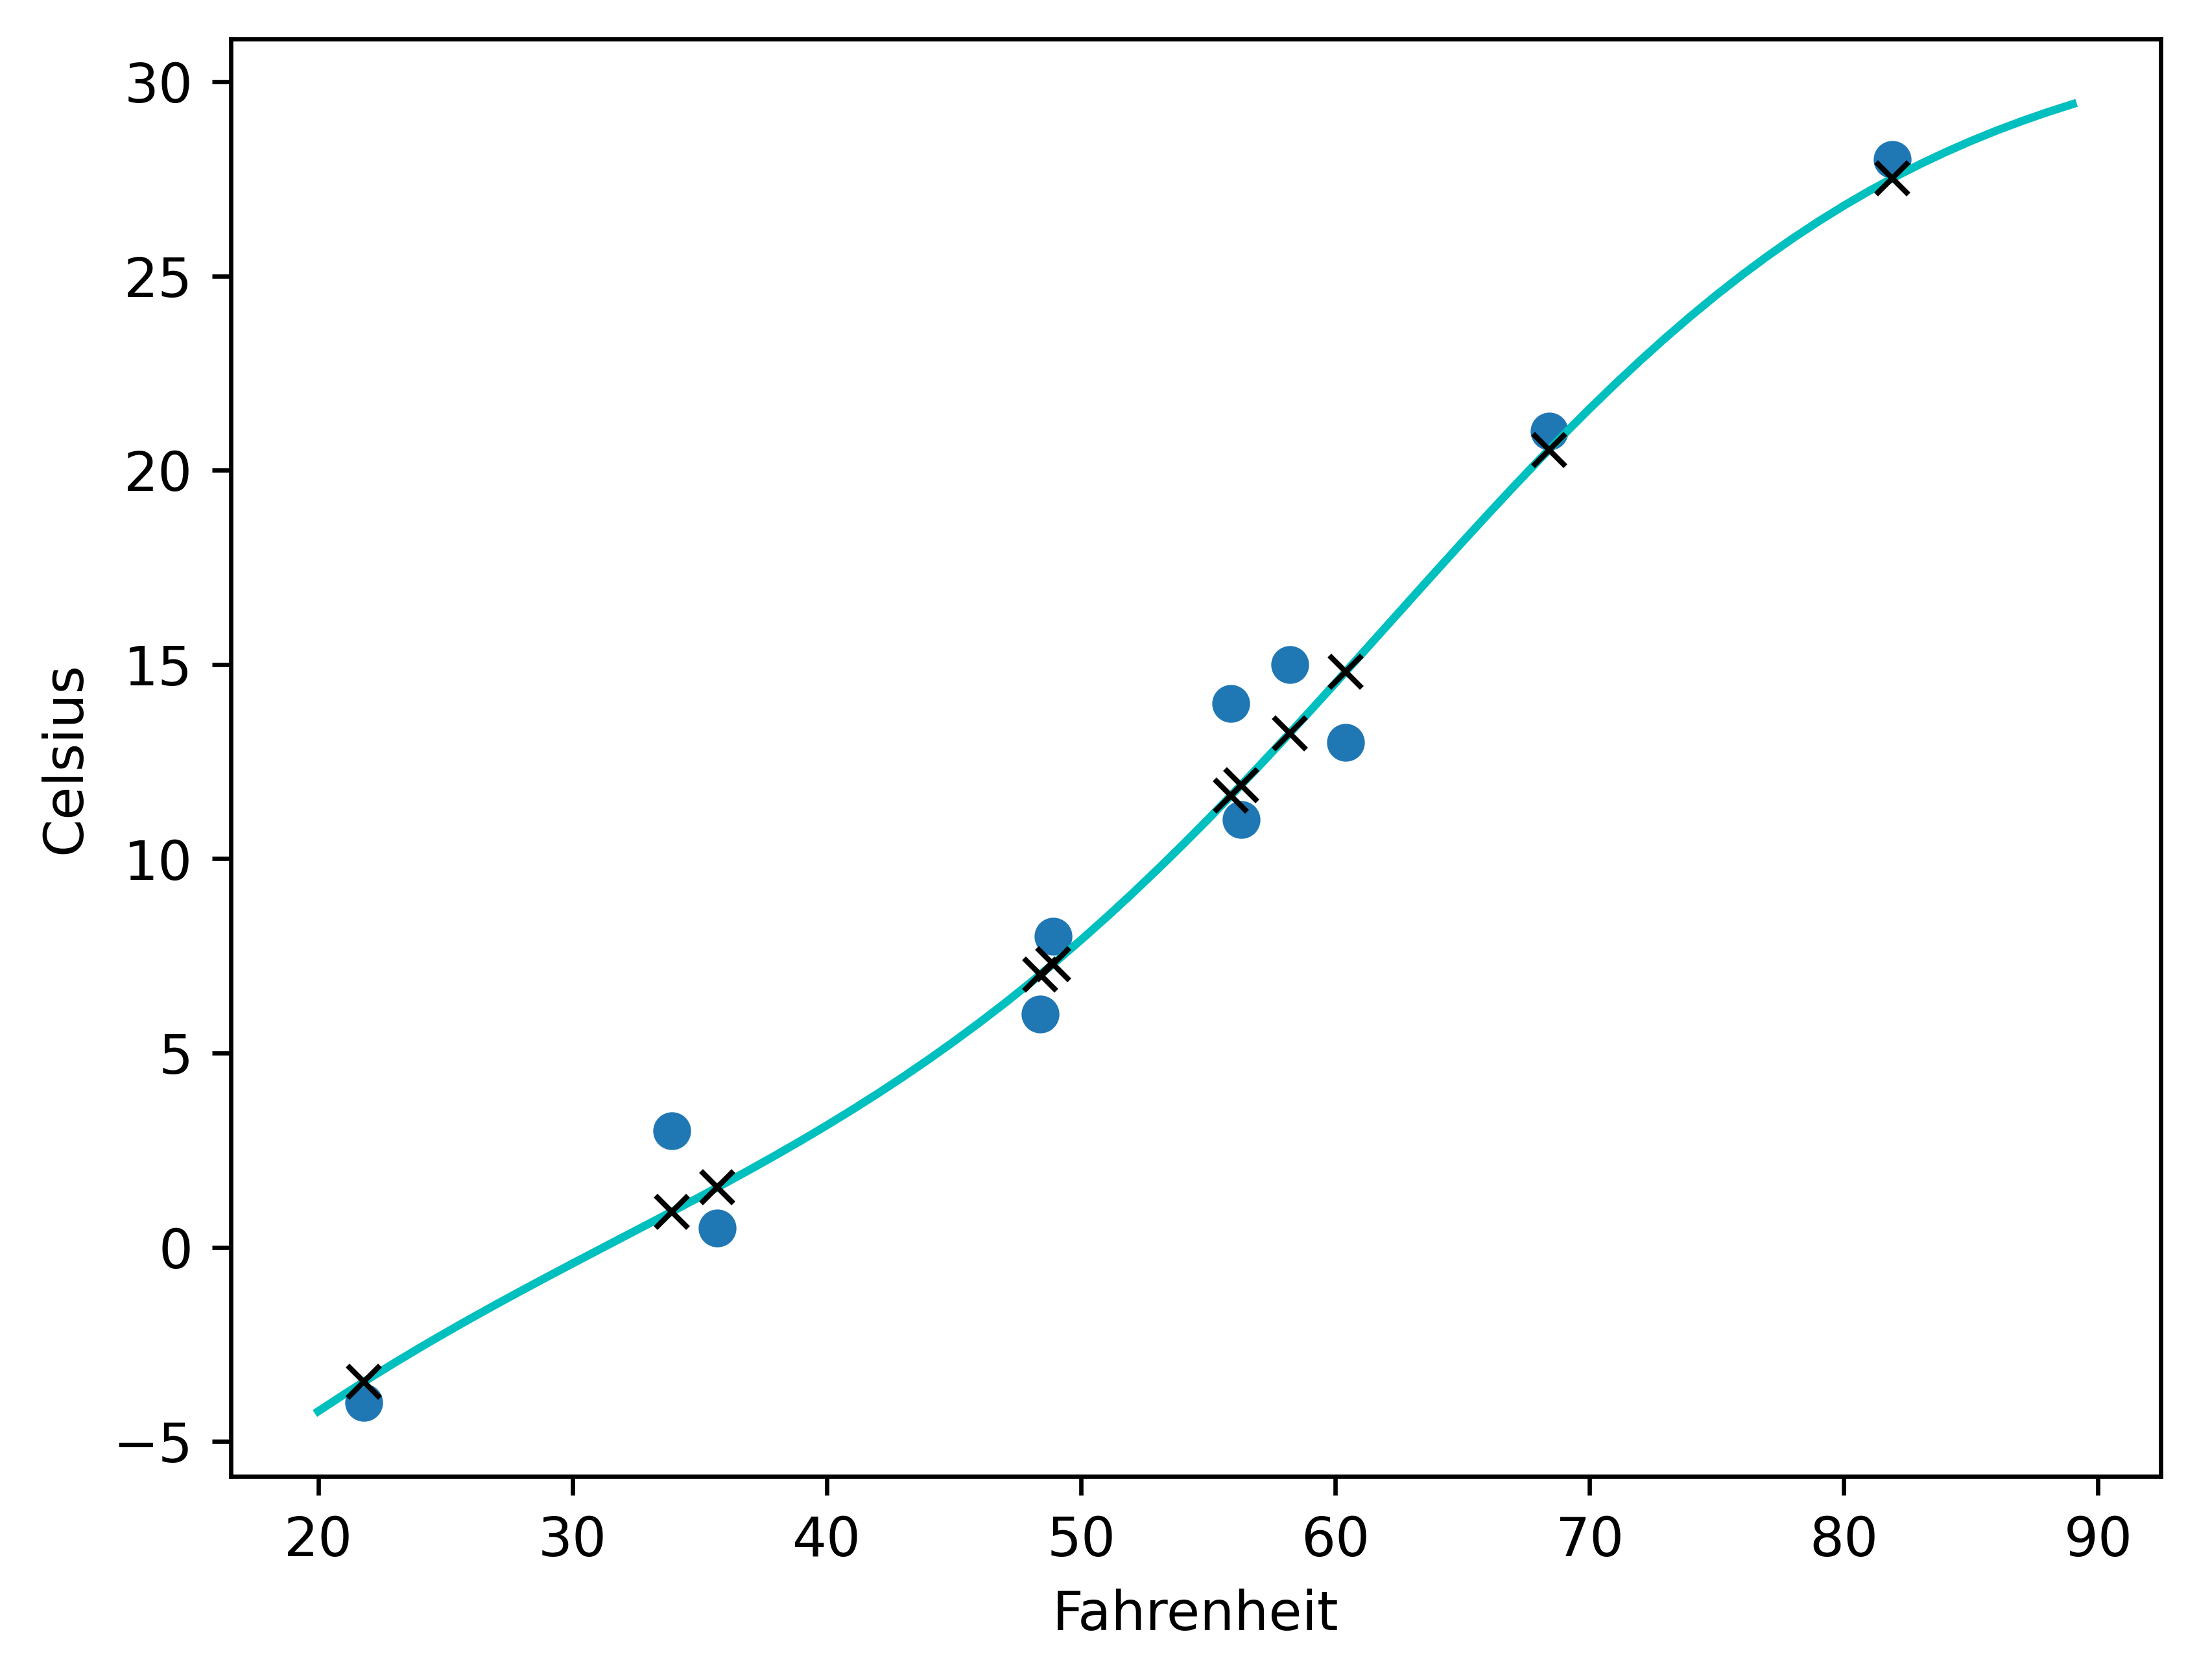

In [ ]:
from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=600)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')


Epoch 1, Training loss 180.0665, Validation loss 263.1898
Epoch 1000, Training loss 62.2454, Validation loss 56.9154
Epoch 2000, Training loss 45.3596, Validation loss 40.8960
Epoch 3000, Training loss 26.2284, Validation loss 25.6288
Epoch 4000, Training loss 15.1810, Validation loss 14.7842
Epoch 5000, Training loss 10.0063, Validation loss 8.9250


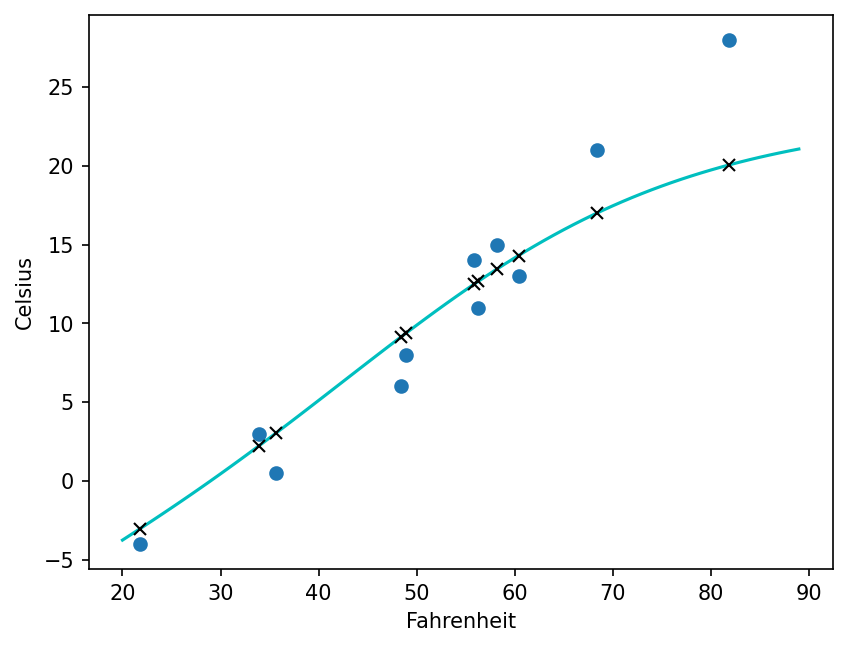

In [ ]:
# Exercises here!

neuron_count = 20
# try yourself: rewrite the seq_model for a neuron count of 20 instead of 13
seq_model = nn.Sequential(
            nn.Linear(1, 20),
            nn.Tanh(),
            nn.Linear(20, 1))


optimizer = optim.SGD(seq_model.parameters(), lr=1e-4)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val)

from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=150)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')
